In [1]:
library(dplyr)
library(ggplot2)
library(zoo)
library(forecast)
library(TSA)
library(uroot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



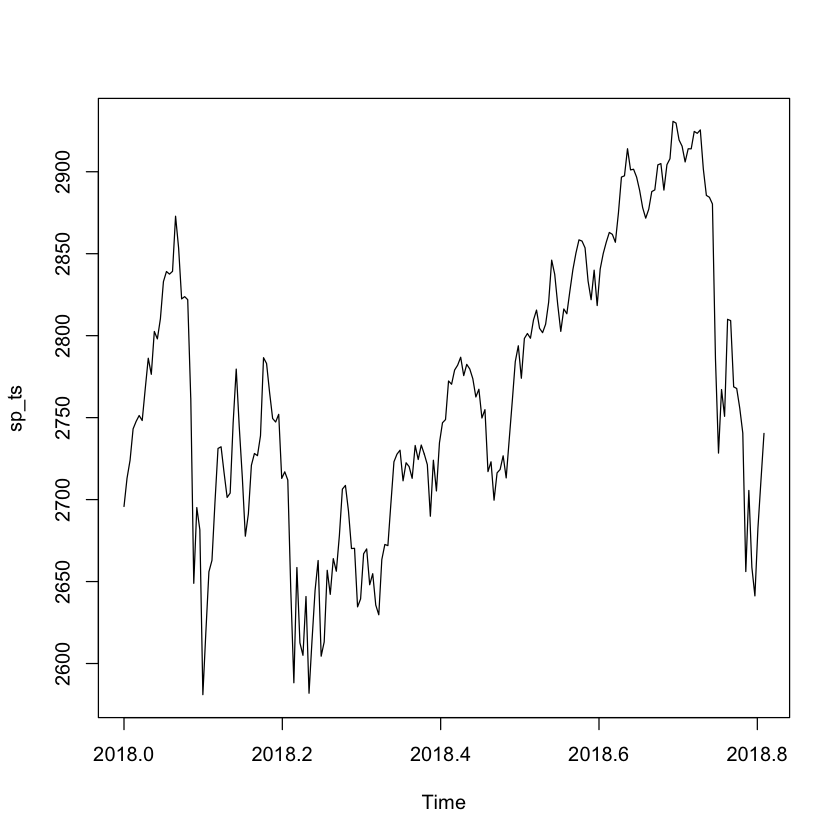

In [2]:
sp <- read.csv("GSPC.csv")
sp$Date <- as.Date(sp$Date, "%Y-%m-%d")
sp_ts <-ts(sp$Close, frequency=261, start=c(2018, 1, 1)) 
plot(sp_ts)

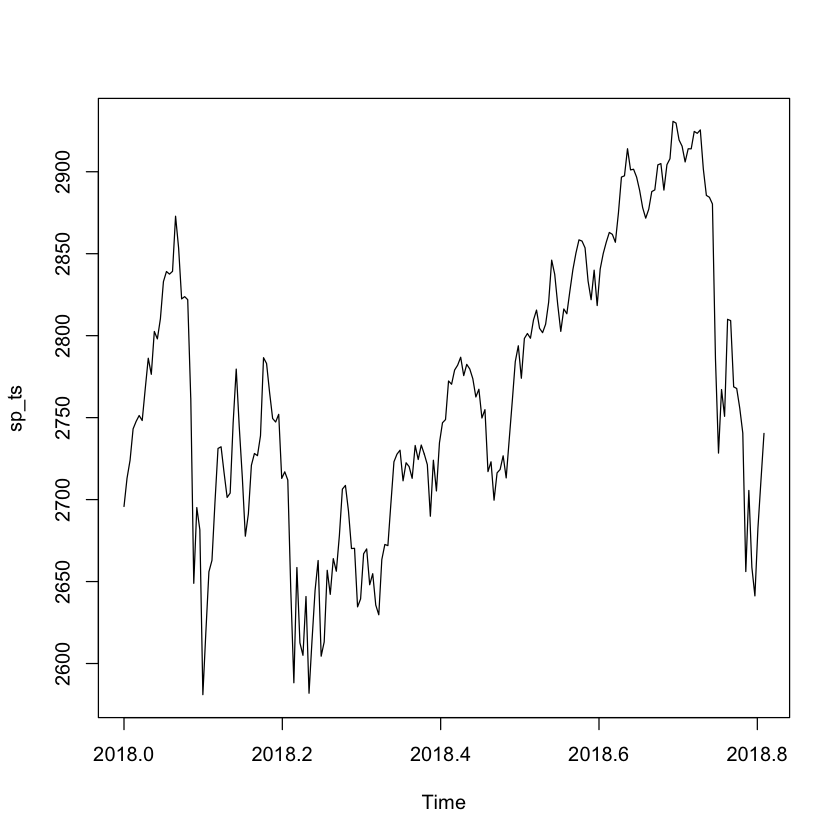

In [3]:
sp_ts <-ts(sp$Close, frequency=261, start=c(2018, 1, 1)) 
plot(sp_ts)

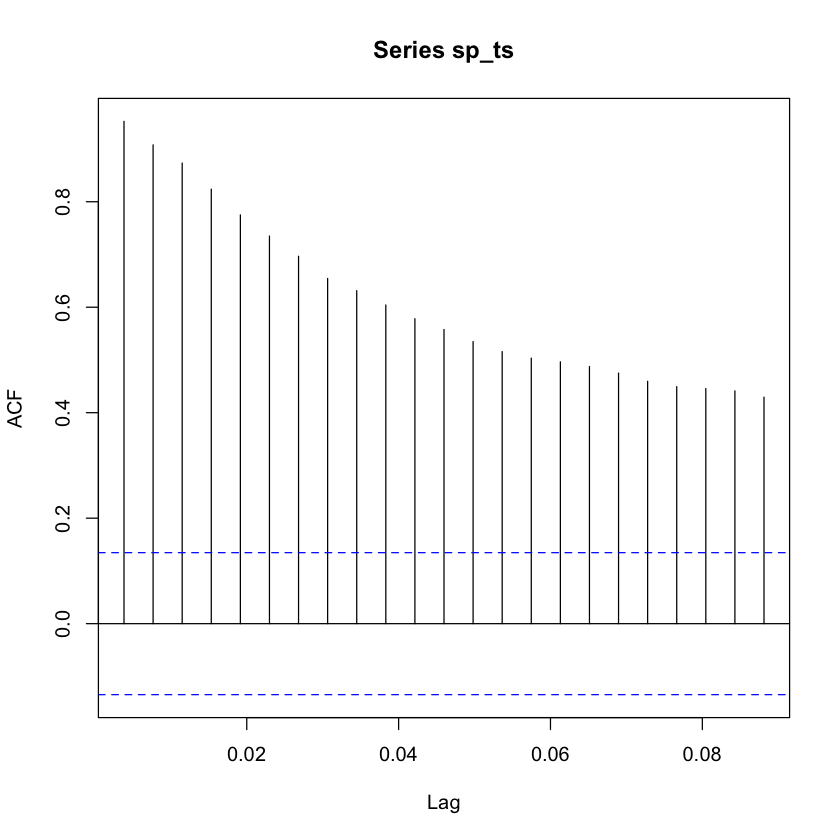

In [4]:
# Ploting acf for the data
acf(sp_ts)

ACF clearly shows that our data is non-stationary, so we try to take the first difference and check if that would make our data becomes stationary

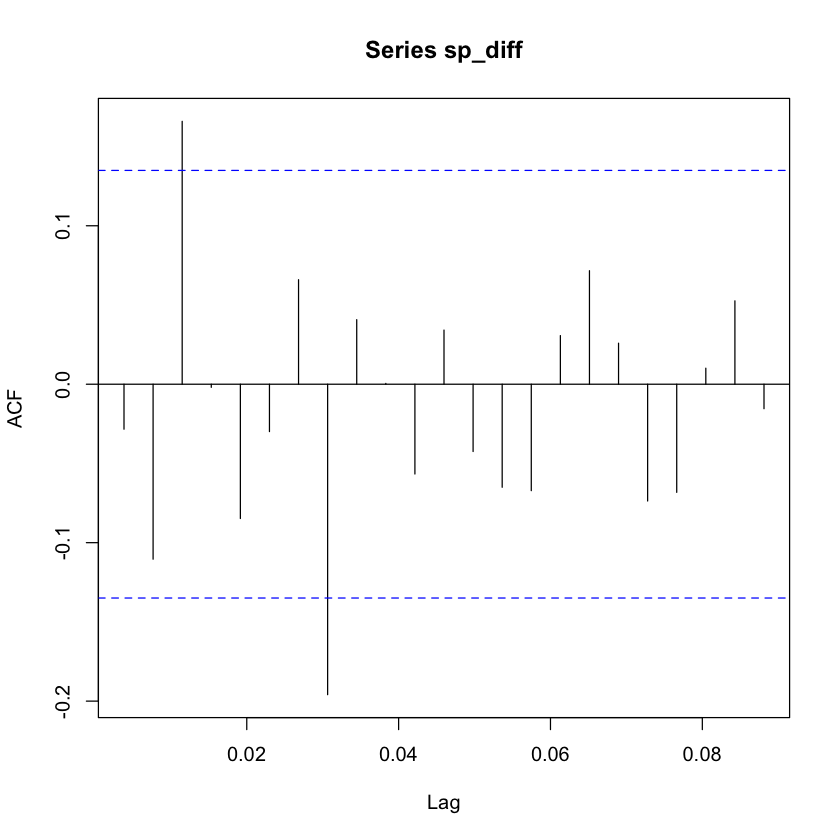

In [5]:
sp_diff <- diff(sp_ts)
# ploting acf for our data
acf(sp_diff)

Even though there are still times when our acf exceed the boundary, considering the fact that stock markets has huge volatity in that specific time, we think it is ok to use this new dataset as a stationary dataset

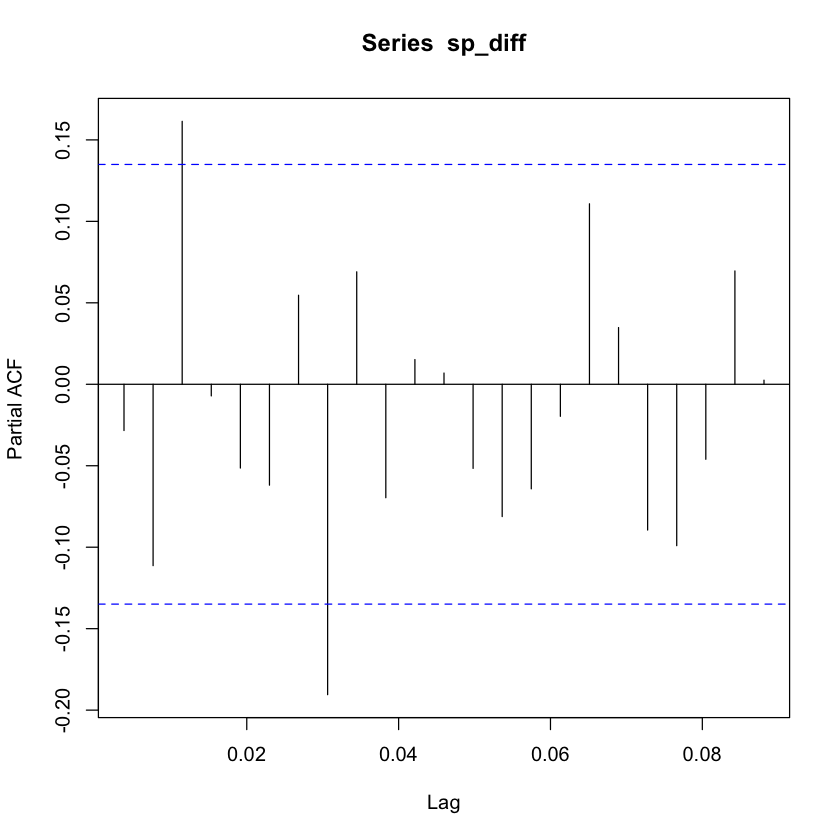

In [6]:
# ploting pacf for our data
pacf(sp_diff)

The above plot shows that an ar(3) or ar(8) model may work for our data

In [7]:
# ploting eacf 
eacf(sp_diff)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o x o o o o x o o o  o  o  o 
1 x o x o o o o x o o o  o  o  o 
2 x x o o o o o x o o o  o  o  o 
3 o x x o o o o x o o o  o  o  o 
4 o o x o o o o x o o o  o  o  o 
5 x x o o x o o x o o o  o  o  o 
6 x x x o x o o x o o o  o  o  o 
7 x x x o x o o o o o o  o  o  o 


Eacf does not provide too much information in this case

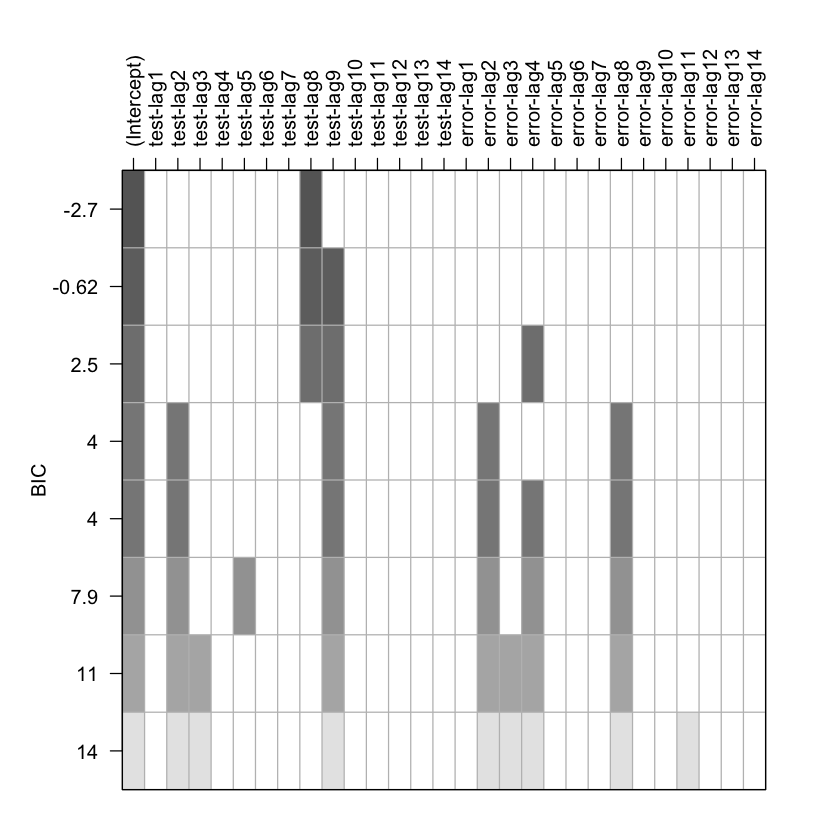

In [8]:
# plot BIC
plot(armasubsets(y=sp_diff,nar=14,nma=14,y.name='test',ar.method='ols'))

BIC plot clearly supports ar(8) model, so we will start from ar(8) model and detrend from there

In [9]:
# Fit our model using arima(8,0,0)
set.seed(92397)
model <- arima(sp_diff, order=c(0,0,0))

In [10]:
# Calculate the residue for model diagonostic
res <- rstandard(model)

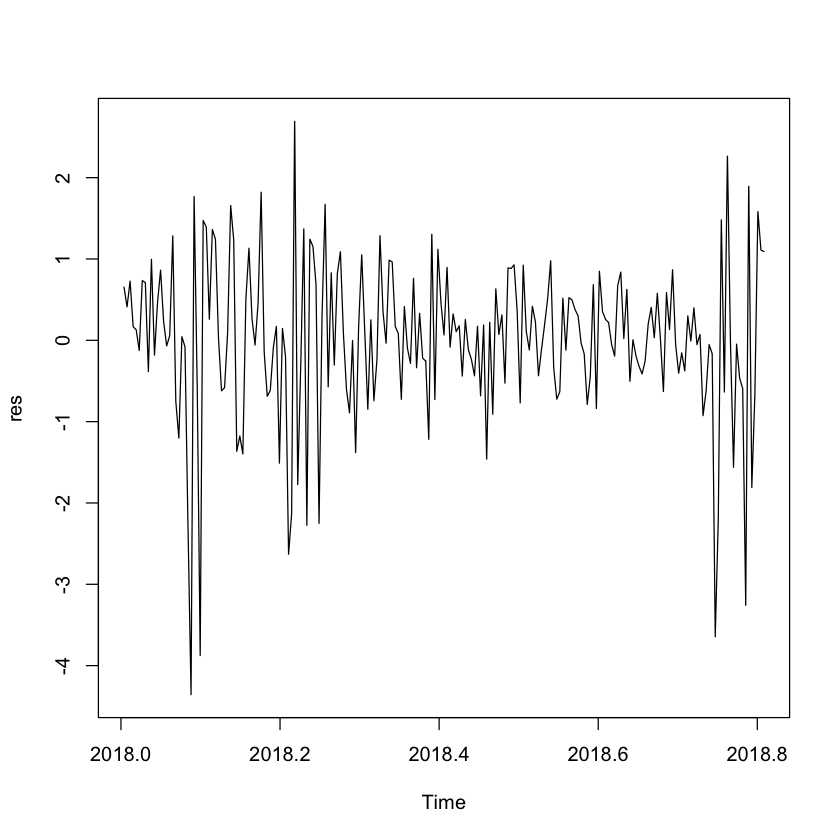

In [11]:
plot(res)

residue looks like white noise with only few exceptions. Therefore, we will continue using this model for future explorations